In [32]:
#John David Conley
#Deep Learning assignment 3

#1. Data Manipulation
#a. Read the provided CSV file ‘data.csv’.
#b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing
#c. Show the basic statistical description about the data.
#d. Check if the data has null values.
#i. Replace the null values with the mean
#e. Select at least two columns and aggregate the data using: min, max, count, mean.
#f. Filter the dataframe to select the rows with calories values between 500 and 1000.
#g. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
#h. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
#i. Delete the “Maxpulse” column from the main df dataframe
#j. Convert the datatype of Calories column to int datatype.
#k. Using pandas create a scatter plot for the two columns (Duration and Calories).
#Example

#2. Linear Regression 
#a) Import the given “Salary_Data.csv”
#b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
#c) Train and predict the model.
#d) Calculate the mean_squared error
#e) Visualize both train and test data using scatter plot

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error


In [37]:
#1
##a/b
dataset = pd.read_csv('data.csv')
##c
dataset.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [38]:
##d
dataset.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [39]:
###i
dataset2 = dataset.fillna(dataset.replace('',dataset.mean()))
dataset2['Calories'] = dataset2['Calories'].fillna(dataset2['Calories'].mean())
dataset2.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [40]:
##e
dataset2.groupby(['Pulse']).agg({'Duration': ['min']}).reset_index()

,Pulse,Duration
,,min
0,80,15
1,83,20
2,85,30
3,90,30
4,92,30
5,93,30
6,95,20
7,97,45
8,98,60


In [41]:
dataset2.groupby(['Pulse']).agg({'Duration': ['max']}).reset_index()

,Pulse,Duration
,,max
0,80,30
1,83,20
2,85,30
3,90,180
4,92,60
5,93,90
6,95,45
7,97,150
8,98,90


In [42]:
dataset2.groupby(['Pulse']).agg({'Duration': ['count']}).reset_index()

,Pulse,Duration
,,count
0,80,2
1,83,1
2,85,1
3,90,12
4,92,3
5,93,3
6,95,3
7,97,7
8,98,6


In [43]:
dataset2.groupby(['Pulse']).agg({'Duration': ['mean']}).reset_index()

,Pulse,Duration
,,mean
0,80,22.500000
1,83,20.000000
2,85,30.000000
3,90,80.000000
4,92,50.000000
5,93,60.000000
6,95,31.666667
7,97,83.571429
8,98,65.000000


In [44]:
##f
dataset2[(dataset2['Calories'] > 500) & (dataset2['Calories'] < 1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [45]:
##g
dataset2[(dataset2['Calories'] > 500) | (dataset2['Calories'] < 100)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
60,210,108,160,1376.0
61,160,110,137,1034.4
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
69,300,108,143,1500.2
70,150,97,129,1115.0
72,90,100,127,700.0


In [46]:
##h
df_modified = dataset2.drop('Maxpulse', axis = 1)
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [47]:
##i
dataset3 = dataset2.copy()
del dataset3['Maxpulse']
dataset3

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [48]:
##j
print(dataset3.dtypes)

Duration      int64
Pulse         int64
Calories    float64
dtype: object


In [49]:
dataset3['Calories'] = dataset3['Calories'].astype(int)
print(dataset3.dtypes)

Duration    int64
Pulse       int64
Calories    int32
dtype: object


In [50]:
dataset3

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


<AxesSubplot:xlabel='Duration', ylabel='Calories'>

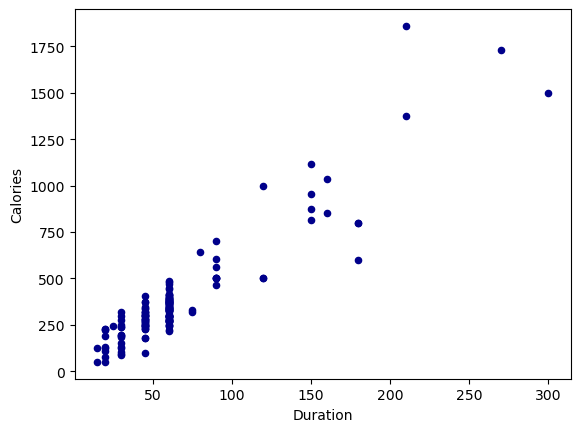

In [51]:
##k
dataset3.plot.scatter(x='Duration', y='Calories', c='DarkBlue')

In [52]:
#2
##
dataset4 = pd.read_csv('Salary_Data.csv')
dataset4

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [53]:
##b
x = dataset4.iloc[:, :-1].values
y = dataset4.iloc[:, 1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.33,random_state = 0)
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [54]:
##c
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [55]:
##d
mean_squared_error(y_test,y_pred)

21026037.329511296

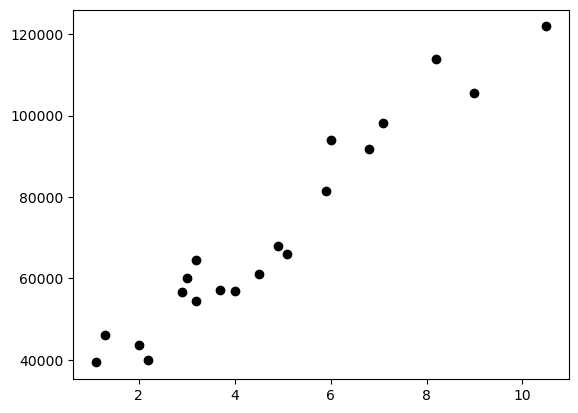

In [56]:
##e
plt.plot(x_train, y_train, 'o', color='black')

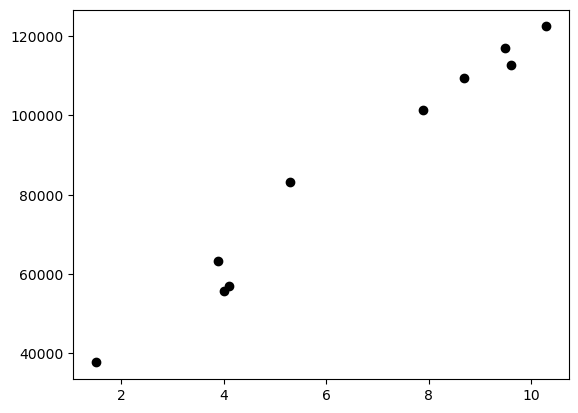

In [57]:
plt.plot(x_test, y_test, 'o', color='black')